In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
import subprocess
import json

# モデルの入力パラメータの定義（パラメータとその範囲）
problem = {
    'num_vars': 10,  # パラメータの数
    'names': ['wall_u_value', 'glass_u_value', 'glass_eta_value', 'Qref_rated_cool', 'Qref_rated_heat',
              'AirHeatExchangeRateCooling', 'AirHeatExchangeRateHeating', 'Fan_air_volume', 'Lighting_rated_power', 'Hot_water_rated_capacity'],
    'bounds': [
        [0.05, 1],       # wall_u_valueの範囲
        [0.1, 5],       # glass_u_valueの範囲
        [0.1, 10],       # glass_eta_valueの範囲
        [1200, 1600],     # Qref_rated_coolの範囲
        [1000, 1300],     # Qref_rated_heatの範囲
        [40, 60],         # AirHeatExchangeRateCoolingの範囲
        [20, 40],         # AirHeatExchangeRateHeatingの範囲
        [2000, 3000],     # Fan_air_volumeの範囲
        [4000, 5500],      # Lighting_rated_powerの範囲
        [15.0, 25.0]
    ]
}

# Saltelliサンプリングで入力サンプルを生成
param_values = saltelli.sample(problem, 1024)

# モデルの実行とBEI値の取得
def run_model(params):
    # param.datファイルに新しいパラメータ値を書き込む
    with open("param.dat", "w") as f:
        f.write(f"wall_u_value = {params[0]}\n")
        f.write(f"glass_u_value = {params[1]}\n")
        f.write(f"glass_eta_value = {params[2]}\n")
        f.write(f"Qref_rated_cool = {params[3]}\n")
        f.write(f"Qref_rated_heat = {params[4]}\n")
        f.write(f"AirHeatExchangeRateCooling = {params[5]}\n")
        f.write(f"AirHeatExchangeRateHeating = {params[6]}\n")
        f.write(f"Fan_air_volume = {params[7]}\n")
        f.write(f"Lighting_rated_power = {params[8]}\n")
        f.write(f"Hot_water_rated_capacity = {params[8]}\n")

    # 外部のPythonスクリプトを実行
    subprocess.run(["python3", "generate_input_zebopt_for_sensitivity.py", "param.dat", "input_zebopt.json"])
    subprocess.run(["python3", "../builelib_zebopt_run.py", "input_zebopt.json", "zebopt"])

    # 実行結果のBEI値をJSONから取得
    with open("zebopt_result.json", "r") as f:
        output_data = json.load(f)
        return output_data["BEI"]

# 各サンプルに対してモデルを実行し、BEI値を取得
Y = np.array([run_model(params) for params in param_values])

# Sobol感度分析を実行
Si = sobol.analyze(problem, Y, print_to_console=True)

# 結果の表示
print("一次Sobol指数 (S1):", Si['S1'])
print("全順序Sobol指数 (ST):", Si['ST'])

/var/folders/gb/554jf77919n71lnl_60zjctm0000gn/T/ipykernel_89255/1352206260.py:27: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1024)
Traceback (most recent call last):
  File "/Users/takato/builelib/analysis_nopush/../builelib_zebopt_run.py", line 18, in <module>
    from builelib.domain.request import AreaByDirection, Room, Building, BuilelibRequest
  File "/Users/takato/builelib/builelib/domain/request.py", line 10, in <module>
    with open(template_directory + "/" + 'template.json', 'r', encoding='utf-8') as f:
FileNotFoundError: [Errno 2] No such file or directory: '/Users/takato/builelib/builelib/builelib/inputdata/template.json'
Traceback (most recent call last):
  File "/Users/takato/builelib/analysis_nopush/../builelib_zebopt_run.py", line 18, in <module>
    from builelib.domain.request import AreaByDirection, Room, Building, BuilelibRequest
  File "/Users/takato/builelib/

KeyboardInterrupt: 

In [6]:
Si['S1']

array([-9.06164361e-04, -8.96787248e-04,  9.81890886e-01,  1.04795515e-02,
       -2.62413953e-04, -1.56511679e-04, -1.23333242e-05,  0.00000000e+00,
        1.86094154e-04,  0.00000000e+00])

In [7]:
 Si['ST']

array([2.04661303e-03, 2.21864321e-03, 9.86812907e-01, 1.31753274e-02,
       4.17787584e-04, 7.57751990e-04, 1.36531890e-06, 0.00000000e+00,
       7.49560077e-04, 0.00000000e+00])

In [39]:
norm_list = [(1-0.05)**2, (5-0.1)**2, (10-0.1)**2, (1600-1200)**2, (1300-1000)**2, (60-40)**2, (40-20)**2, (3000-2000)**2, (5500-4000)**2, (25-15)**2]


(array([1.82430111e-01, 7.43367049e-03, 8.09976522e-01, 6.62444398e-06,
        3.73440158e-07, 1.52396535e-04, 2.74588351e-07, 0.00000000e+00,
        2.67998231e-08, 0.00000000e+00]),
 0.9999999999999999)

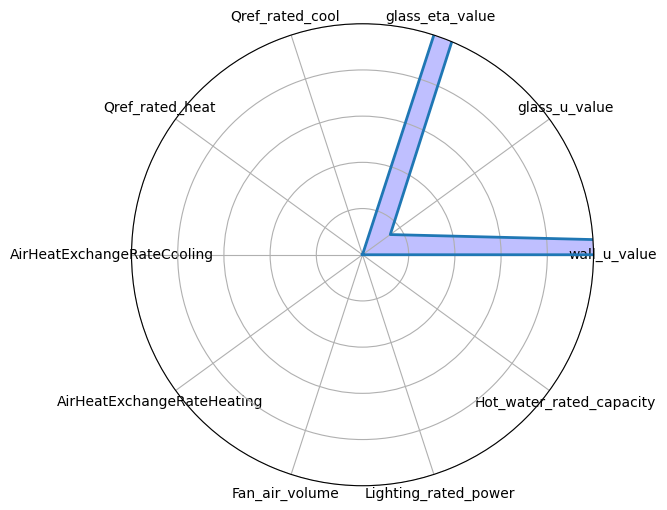

In [44]:
import matplotlib.pyplot as plt

sensitivity = Si['ST']/norm_list
normalized_sensitivity = sensitivity / np.sum(sensitivity)

normalized_sensitivity, np.sum(normalized_sensitivity)
# Number of variables
categories = ['wall_u_value', 'glass_u_value', 'glass_eta_value', 'Qref_rated_cool', 'Qref_rated_heat',
              'AirHeatExchangeRateCooling', 'AirHeatExchangeRateHeating', 'Fan_air_volume', 'Lighting_rated_power', 'Hot_water_rated_capacity']
# Number of variables
num_vars = len(categories)

# Compute the angle for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start value to the end.
angles += angles[:1]
normalized_sensitivity = np.concatenate((normalized_sensitivity, [normalized_sensitivity[0]]))

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the radar chart
ax.plot(angles, normalized_sensitivity, linewidth=2, linestyle='solid')
ax.fill(angles, normalized_sensitivity, 'b', alpha=0.25)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Set y-axis limits to stretch out the small values
ax.set_ylim(0, 0.05)

# Display the radar chart
plt.show()

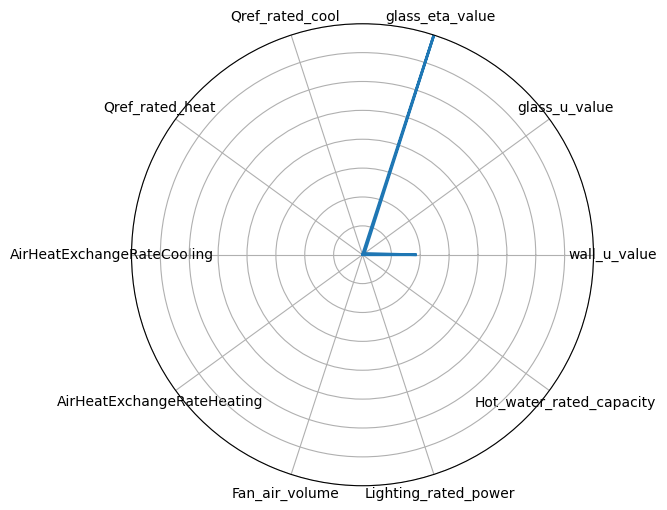

In [43]:
import matplotlib.pyplot as plt

sensitivity = Si['ST']/norm_list
normalized_sensitivity = sensitivity / np.sum(sensitivity)

normalized_sensitivity, np.sum(normalized_sensitivity)
# Number of variables
categories = ['wall_u_value', 'glass_u_value', 'glass_eta_value', 'Qref_rated_cool', 'Qref_rated_heat',
              'AirHeatExchangeRateCooling', 'AirHeatExchangeRateHeating', 'Fan_air_volume', 'Lighting_rated_power', 'Hot_water_rated_capacity']
# Number of variables
num_vars = len(categories)

# Compute the angle for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start value to the end.
angles += angles[:1]
normalized_sensitivity = np.concatenate((normalized_sensitivity, [normalized_sensitivity[0]]))

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the radar chart
ax.plot(angles, normalized_sensitivity, linewidth=2, linestyle='solid')
ax.fill(angles, normalized_sensitivity, 'b', alpha=0.25)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Set y-axis limits to stretch out the small values
ax.set_ylim(0, 0.8)

# Display the radar chart
plt.show()